In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
sns.set(color_codes=True)

## Histogramas

Os histogramas são provavelmente familiares e histjá existe uma função no matplotlib. Um histograma representa a distribuição de dados formando caixas ao longo do intervalo dos dados e, em seguida, desenhando barras para mostrar o número de observações que caem em cada caixa.



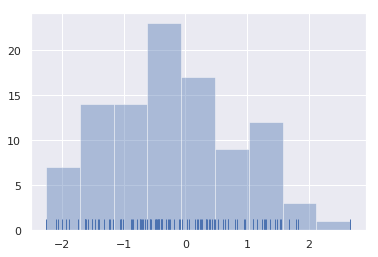

In [5]:
x = np.random.normal(size=100)
#sns.distplot(x);
sns.distplot(x, kde=False, rug=True);

Ao desenhar histogramas, a principal escolha que você tem é o número de posições a serem usadas e onde colocá-las. ``distplot()`` usa uma regra simples para adivinhar qual é o número correto por padrão, mas tentar mais ou menos caixas pode revelar outros recursos nos dados:

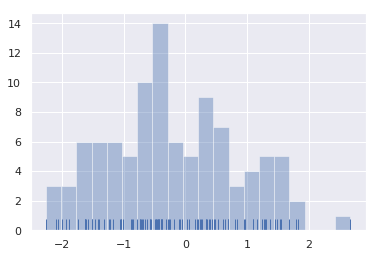

In [6]:
sns.distplot(x, bins=20, kde=False, rug=True);

## Gráficos de dispersão

A maneira mais familiar de visualizar uma distribuição bivariada é um gráfico de dispersão, onde cada observação é mostrada com um ponto nos valores x e y . Isso é análogo a uma plotagem de tapete em duas dimensões. Você pode desenhar um gráfico de dispersão com a ``plt.scatter`` ``matplotlib`` e também é o tipo padrão de plotagem mostrado pela ``jointplot()``:

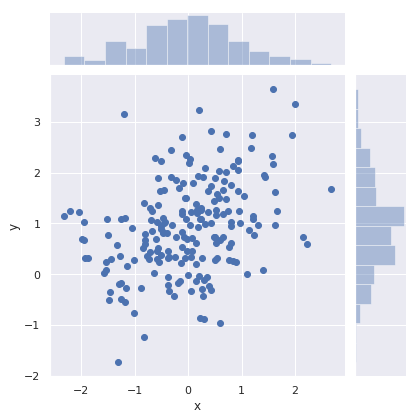

In [8]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])


sns.jointplot(x="x", y="y", data=df);

## Gráfico Hexbin

O análogo bivariado de um histograma é conhecido como um gráfico “hexbin”, porque mostra as contagens de observações que caem dentro de caixas hexagonais. Este gráfico funciona melhor com conjuntos de dados relativamente grandes. Está disponível através da ``plt.hexbin`` ``matplotlib`` e como um estilo em ``jointplot()``. Parece melhor com um fundo branco:

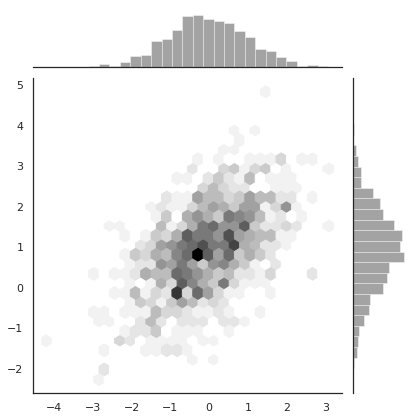

In [9]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

## Visualizando relacionamentos emparelhados em um conjunto de dados 

Para plotar várias distribuições bivariadas de pares em um conjunto de dados, você pode usar a ``pairplot()``. Isso cria uma matriz de eixos e mostra o relacionamento de cada par de colunas em um ``DataFrame``. Por padrão, também desenha a distribuição univariada de cada variável nos Eixos diagonais:

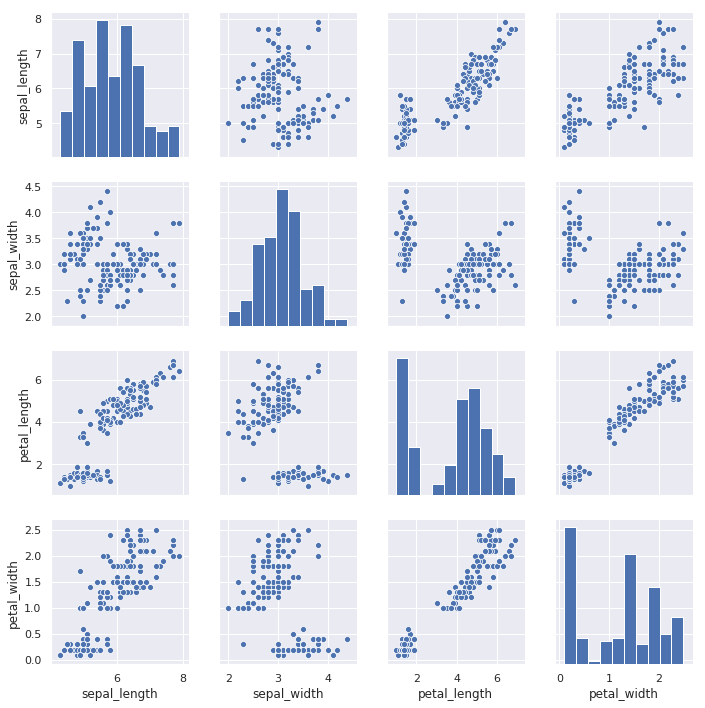

In [10]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

Muito parecido com o relacionamento entre ``jointplot()`` e ``JointGrid``, a ``pairplot()`` é construída no topo de um ``PairGrid`` objeto, que pode ser usada diretamente para mais flexibilidade:

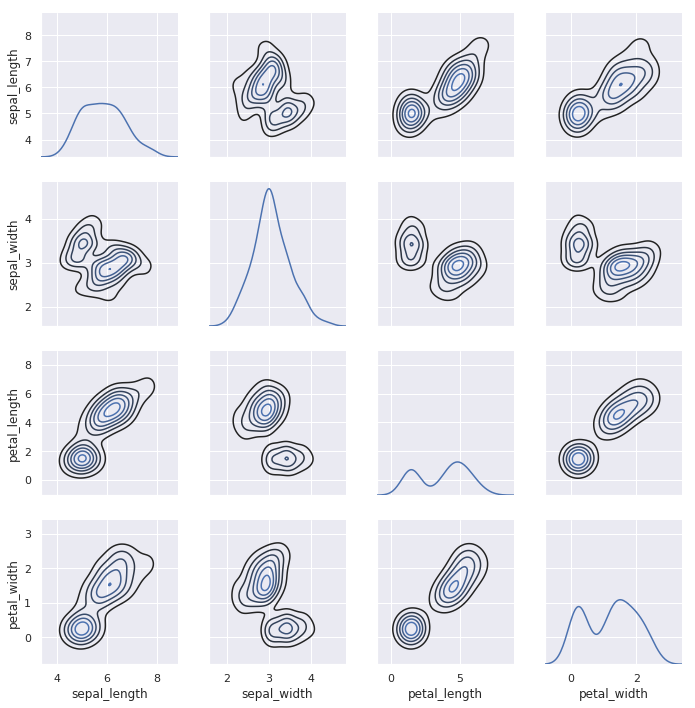

In [11]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);